In [1]:
import sys
import os
from glob import glob
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import matplotlib.pyplot as plt
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

sys.path.append("../Import")
from definitions import crop_list2

root_path = "../"
data_path = f"{root_path}data/"

In [3]:
class EDA:
    
    import numpy as np
    import pandas as pd
    pd.options.display.float_format = '{:.3f}'.format

    import matplotlib.pyplot as plt
    import koreanize_matplotlib
    %config InlineBackend.figure_format = 'retina'
    import seaborn as sns

    def print_title(body, br=2, bp="┌▣ ", hr=" ---- ---- ---- ----"):

        """
        body : 내용
        bp : bullet point, 글머리 기호
        hr : Horizontal Rule, 수평선
        """

        class ff:
            PURPLE = "\033[95m"
            CYAN = "\033[96m"
            DARKCYAN = "\033[36m"
            BLUE = "\033[94m"
            GREEN = "\033[92m"
            YELLOW = "\033[93m"
            RED = "\033[91m"
            BOLD = "\033[1m"
            UNDERLINE = "\033[4m"
            END = "\033[0m"

        print("\n" * br + ff.BOLD + bp + ff.UNDERLINE + body + ff.END + hr)

    def Check(df) -> pd.DataFrame:

        EDA.print_title("""df.shape""")
        print(df.shape)

        EDA.print_title("""df.info()""")
        print(df.info())

        EDA.print_title("""df.head()""")
        display(df.head())

    def uv(df) -> None:

        EDA.print_title("""df.describe().T""")
        display(df.describe().T)

        EDA.print_title("""df.describe(include=['O'])""")
        display(df.describe(include=["O"]))

        df_temp = df.isna()
        EDA.print_title("""df.isna().sum()""")
        display(df_temp.sum().to_frame())

        EDA.print_title("""sns.heatmap(data=df.isna())""")
        sns.heatmap(data=df_temp)
        plt.show()

        EDA.print_title("df.isna().mean()")
        display(df_temp.mean().to_frame())

        # 분포
        EDA.print_title("df.hist()")
        df.hist(bins=100, figsize=(15, 10));

    def mv(df):

        df_corr = df.corr()
        EDA.print_title("""df.corr()""")
        display(df_corr)
        EDA.print_title("""sns.heatmap(data=df.corr(), annot=True, fmt=".2f")""")
        display(sns.heatmap(data=df_corr, annot=True, fmt=".2f"))

In [4]:
# 경로 자신에게 맞게 확인
df_raw = pd.read_csv("../Data/AgriMarket.csv")
EDA.Check(df_raw)



┌▣ df.shape ---- ---- ---- ----
(15880, 11)


┌▣ df.info() ---- ---- ---- ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15880 entries, 0 to 15879
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YMD               15880 non-null  int64  
 1   YM                15880 non-null  int64  
 2   MD                15880 non-null  int64  
 3   Product           15880 non-null  object 
 4   Price             15880 non-null  float64
 5   환율(원/US$)         15880 non-null  float64
 6   콜금리(연%)           15880 non-null  float64
 7   item_PPI          11910 non-null  float64
 8   item_CPI          15880 non-null  float64
 9   Food Price Index  15880 non-null  float64
 10  Cereals           15880 non-null  float64
dtypes: float64(7), int64(3), object(1)
memory usage: 1.3+ MB
None


┌▣ df.head() ---- ---- ---- ----


,YMD,YM,MD,Product,Price,환율(원/US$),콜금리(연%),item_PPI,item_CPI,Food Price Index,Cereals
0,20050103,200501,103,감자,6323.101,1013.000,3.330,71.150,69.162,65.400,60.500
1,20050103,200501,103,고구마,4291.111,1013.000,3.330,53.120,41.811,65.400,60.500
2,20050103,200501,103,깻잎,4534.333,1013.000,3.330,NaN,53.348,65.400,60.500
3,20050103,200501,103,마늘,20785.714,1013.000,3.330,49.580,58.270,65.400,60.500
4,20050104,200501,104,감자,6233.314,1013.000,3.330,71.150,69.162,65.400,60.500


# ㅁㄴㅇㄻㄴㅇㄹ

In [9]:
df = df_raw[df_raw["Product"] == "마늘"]



┌▣ df.describe().T ---- ---- ---- ----


,count,mean,std,min,25%,50%,75%,max
YMD,3970.000,20125225.353,46176.665,20050103.000,20081217.250,20121166.500,20161214.750,20201231.000
YM,3970.000,201252.093,461.766,200501.000,200812.000,201211.500,201612.000,202012.000
MD,3970.000,668.678,344.341,102.000,402.000,703.000,1001.000,1231.000
Price,3970.000,37050.694,17608.986,11598.788,18493.333,37812.500,49300.000,73375.000
환율(원/US$),3970.000,1108.048,88.890,929.600,1055.300,1138.900,1167.600,1257.500
콜금리(연%),3970.000,2.528,1.214,0.700,1.590,2.340,3.330,4.780
item_PPI,3970.000,83.573,34.477,36.300,49.450,78.890,113.730,150.190
item_CPI,3970.000,91.187,25.447,55.964,62.591,90.545,115.149,148.957
Food Price Index,3970.000,100.666,18.326,65.400,91.100,97.000,118.200,137.600
Cereals,3970.000,104.581,24.780,59.400,90.500,98.700,124.400,163.300




┌▣ df.describe(include=['O']) ---- ---- ---- ----


,Product
count,3970
unique,1
top,마늘
freq,3970




┌▣ df.isna().sum() ---- ---- ---- ----


,0
YMD,0
YM,0
MD,0
Product,0
Price,0
환율(원/US$),0
콜금리(연%),0
item_PPI,0
item_CPI,0
Food Price Index,0




┌▣ sns.heatmap(data=df.isna()) ---- ---- ---- ----


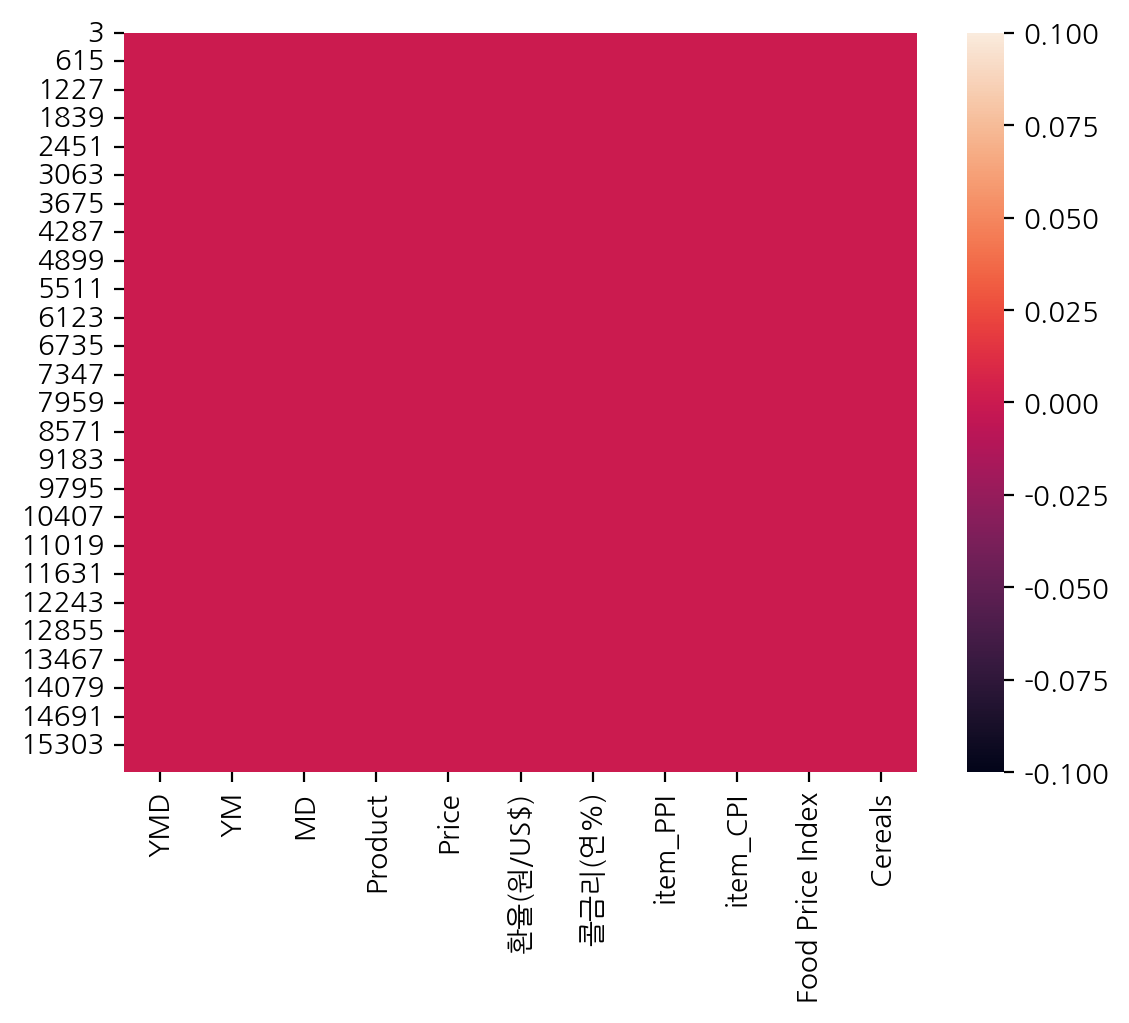



┌▣ df.isna().mean() ---- ---- ---- ----


,0
YMD,0.000
YM,0.000
MD,0.000
Product,0.000
Price,0.000
환율(원/US$),0.000
콜금리(연%),0.000
item_PPI,0.000
item_CPI,0.000
Food Price Index,0.000




┌▣ df.hist() ---- ---- ---- ----


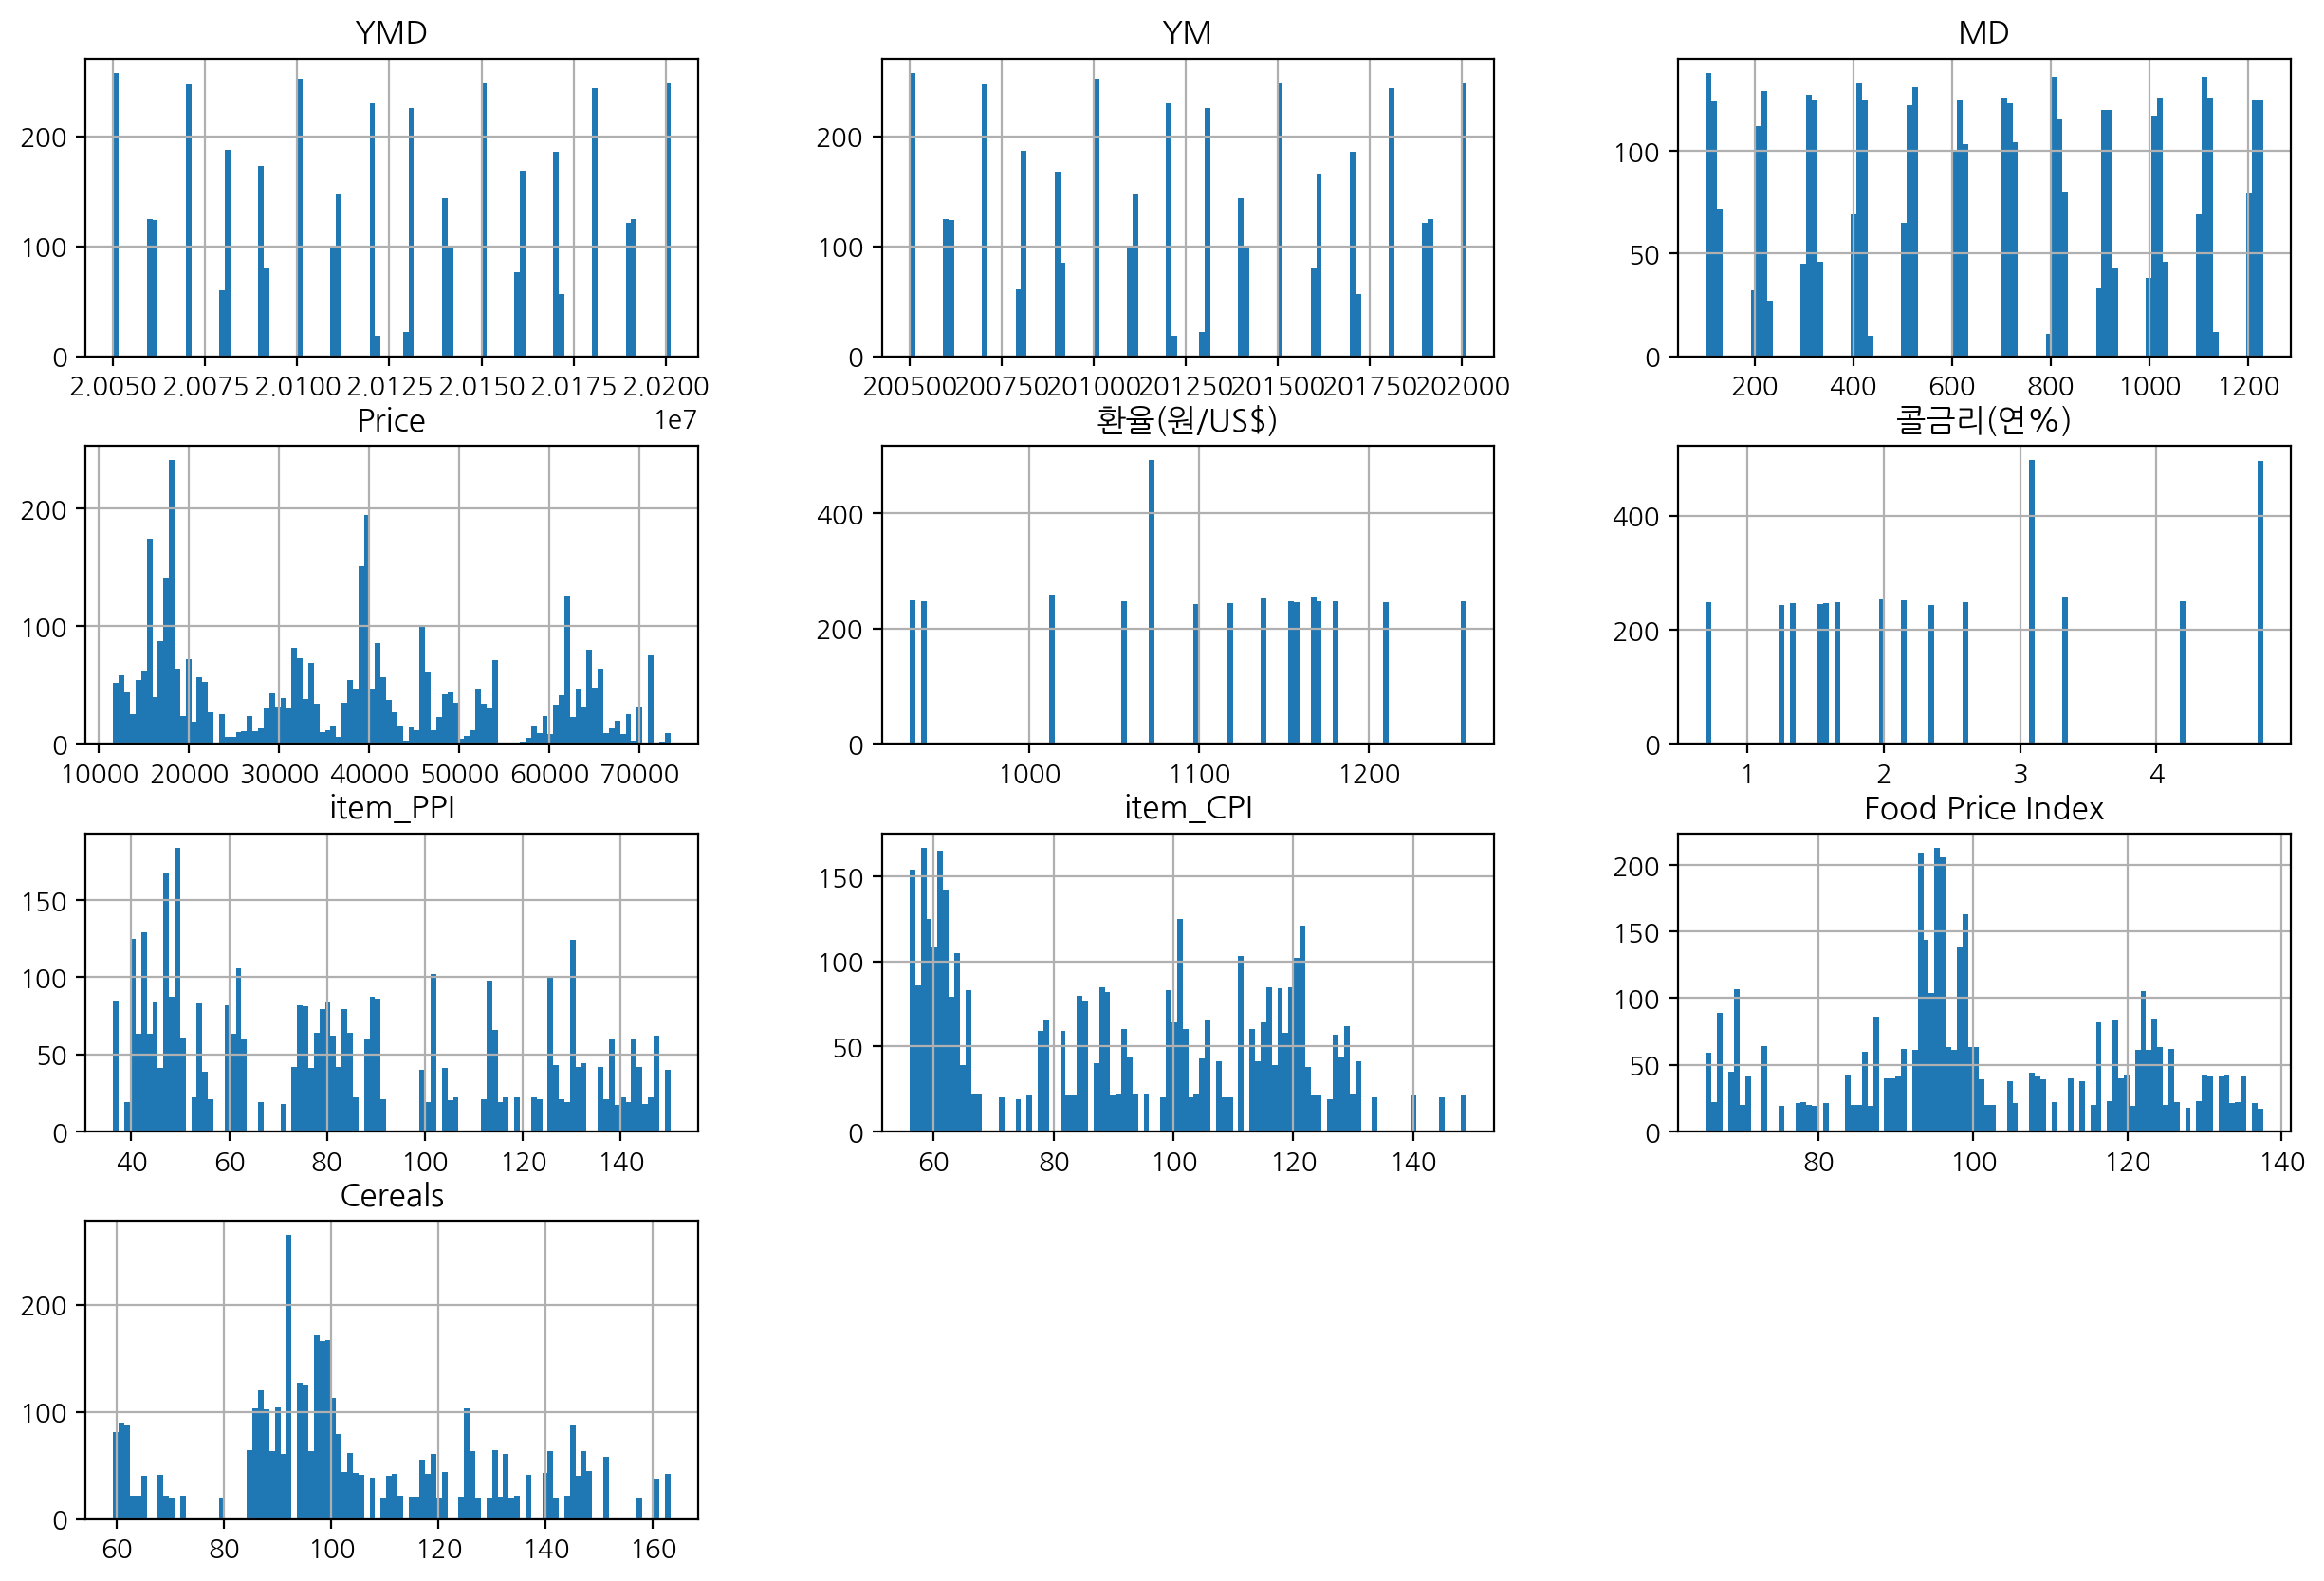

In [10]:
EDA.uv(df)

array([[<AxesSubplot: title={'center': '환율(원/US$)'}>,
        <AxesSubplot: title={'center': '콜금리(연%)'}>],
       [<AxesSubplot: title={'center': 'item_PPI'}>,
        <AxesSubplot: title={'center': 'item_CPI'}>],
       [<AxesSubplot: title={'center': 'Food Price Index'}>,
        <AxesSubplot: title={'center': 'Cereals'}>]], dtype=object)

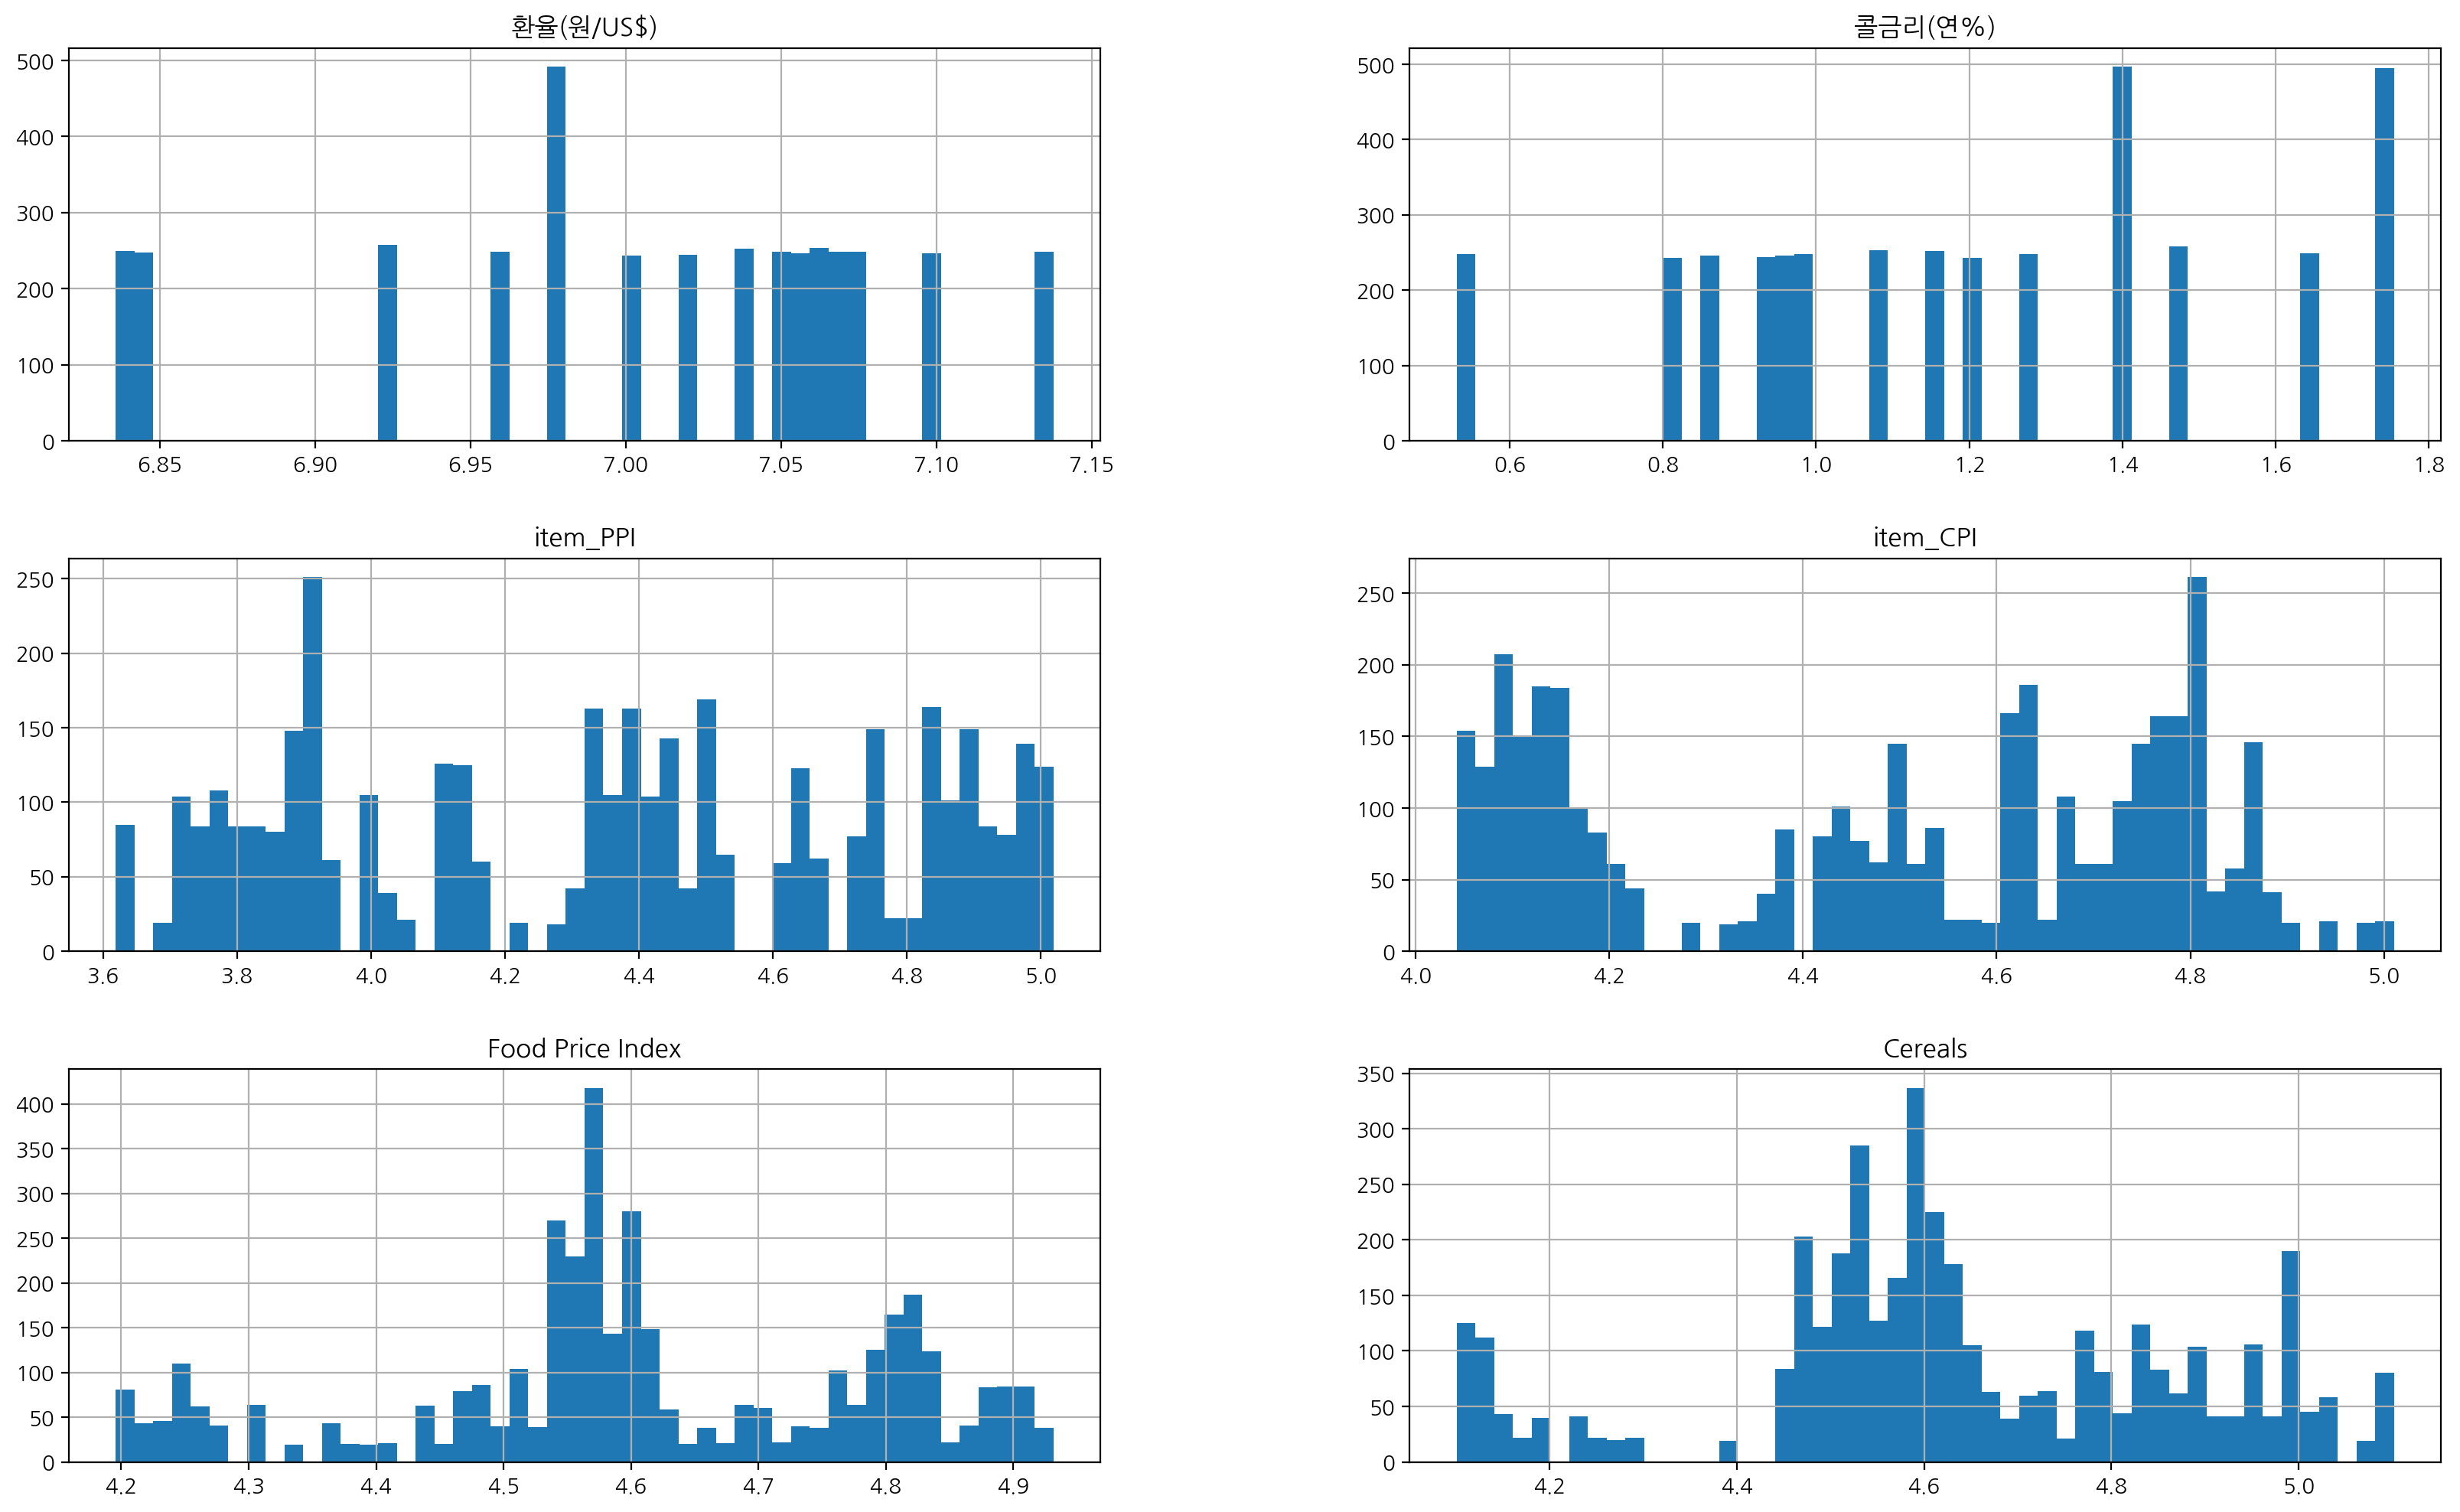

In [30]:
col = ['환율(원/US$)','콜금리(연%)', 'item_PPI'	,'item_CPI',	'Food Price Index',	'Cereals']
df_log1p = df.copy()
for i in col:
    df_log1p[i] = np.log1p(df[i])
display(df_log1p[col].hist(bins=50, figsize=(20,12)))

<AxesSubplot: xlabel='Food Price Index'>

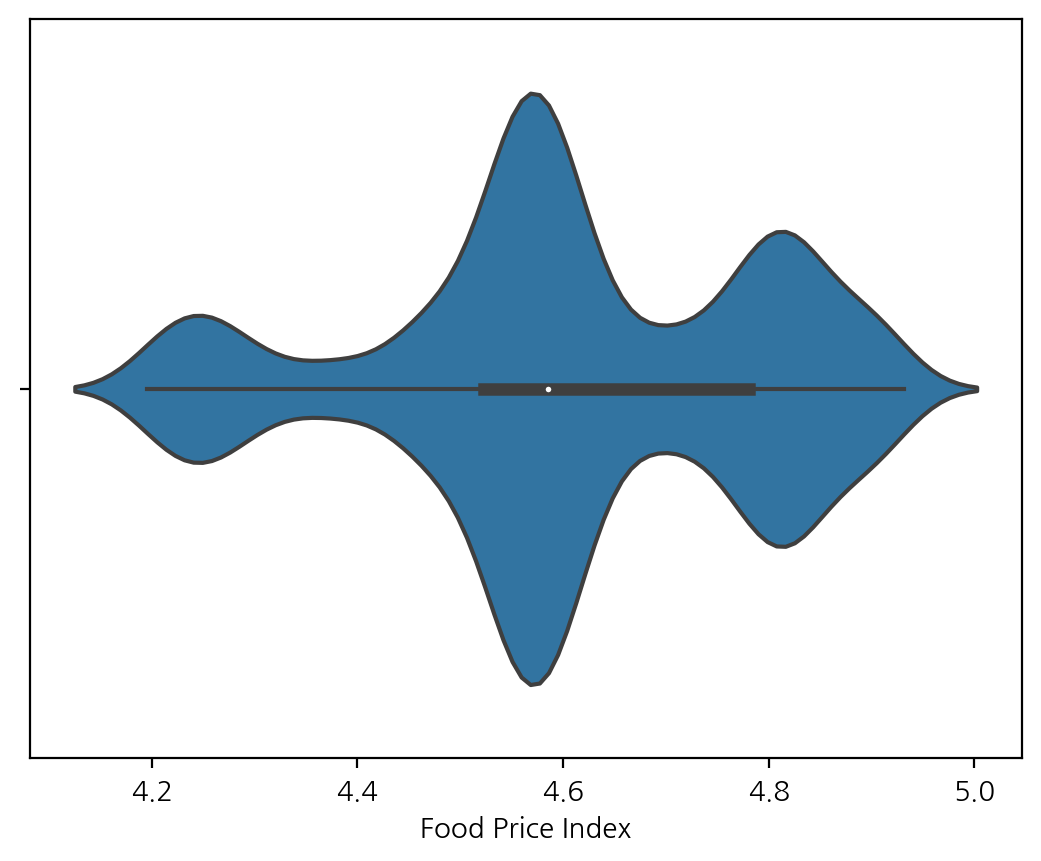

In [33]:
sns.violinplot(df_log1p, x="Food Price Index")

In [43]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit_transform(df_log1p[col])
# transformer

df = df_log1p.copy()

df[col] = transformer
df

,YMD,YM,MD,Product,Price,환율(원/US$),콜금리(연%),item_PPI,item_CPI,Food Price Index,Cereals
3,20050103,200501,103,마늘,20785.714,-1.158,0.505,-0.556,-0.722,-1.509,-1.533
7,20050104,200501,104,마늘,20785.714,-1.158,0.505,-0.556,-0.722,-1.509,-1.533
11,20050105,200501,105,마늘,20928.571,-1.158,0.505,-0.556,-0.722,-1.509,-1.533
15,20050106,200501,106,마늘,21071.429,-1.158,0.505,-0.556,-0.722,-1.509,-1.533
19,20050107,200501,107,마늘,21071.429,-1.158,0.505,-0.556,-0.722,-1.509,-1.533
...,...,...,...,...,...,...,...,...,...,...,...
15863,20201224,202012,1224,마늘,53533.333,0.351,-1.314,0.310,0.438,0.434,0.519
15867,20201228,202012,1228,마늘,53533.333,0.351,-1.314,0.310,0.438,0.434,0.519
15871,20201229,202012,1229,마늘,53533.333,0.351,-1.314,0.310,0.438,0.434,0.519
15875,20201230,202012,1230,마늘,53533.333,0.351,-1.314,0.310,0.438,0.434,0.519


<AxesSubplot: >

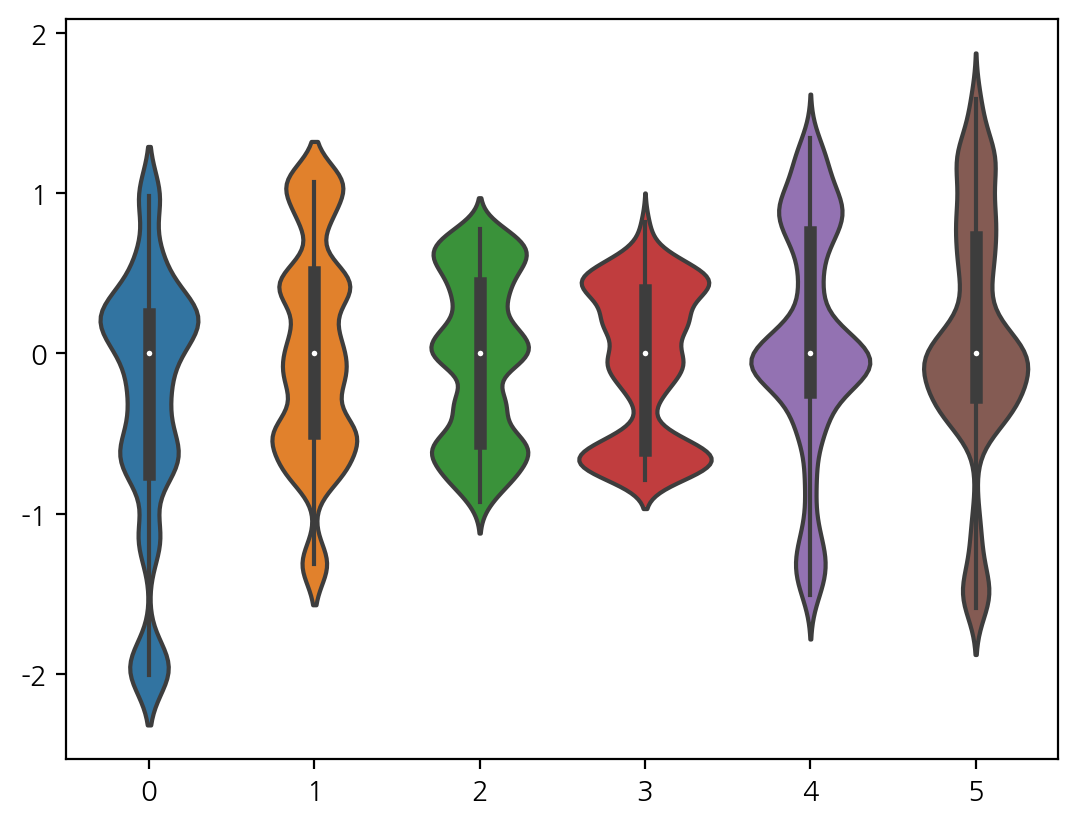

In [42]:
sns.violinplot(transformer)



┌▣ df.corr() ---- ---- ---- ----


,YMD,YM,MD,Price,환율(원/US$),콜금리(연%),item_PPI,item_CPI,Food Price Index,Cereals
YMD,1.000,1.000,0.003,0.716,0.464,-0.837,0.684,0.747,0.186,0.103
YM,1.000,1.000,0.003,0.716,0.464,-0.837,0.684,0.747,0.186,0.103
MD,0.003,0.003,1.000,-0.044,0.006,-0.001,0.012,0.037,0.032,0.007
Price,0.716,0.716,-0.044,1.000,0.348,-0.680,0.926,0.889,0.184,0.080
환율(원/US$),0.464,0.464,0.006,0.348,1.000,-0.451,0.322,0.352,0.355,0.351
콜금리(연%),-0.837,-0.837,-0.001,-0.680,-0.451,1.000,-0.653,-0.650,0.040,0.149
item_PPI,0.684,0.684,0.012,0.926,0.322,-0.653,1.000,0.957,0.181,0.079
item_CPI,0.747,0.747,0.037,0.889,0.352,-0.650,0.957,1.000,0.315,0.220
Food Price Index,0.186,0.186,0.032,0.184,0.355,0.040,0.181,0.315,1.000,0.959
Cereals,0.103,0.103,0.007,0.080,0.351,0.149,0.079,0.220,0.959,1.000




┌▣ sns.heatmap(data=df.corr(), annot=True, fmt=".2f") ---- ---- ---- ----


<AxesSubplot: >

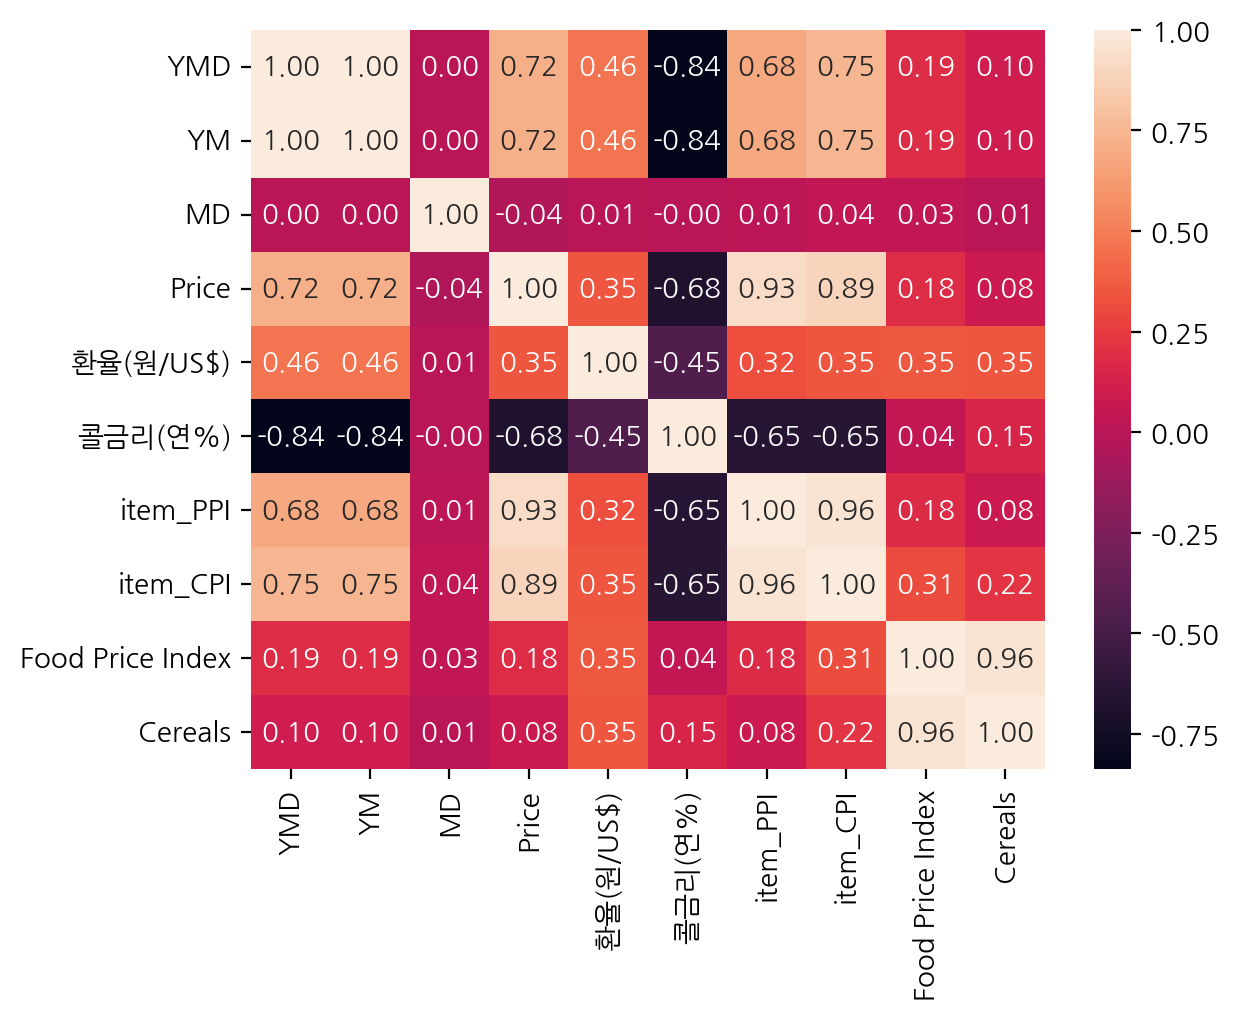

In [11]:
EDA.mv(df)

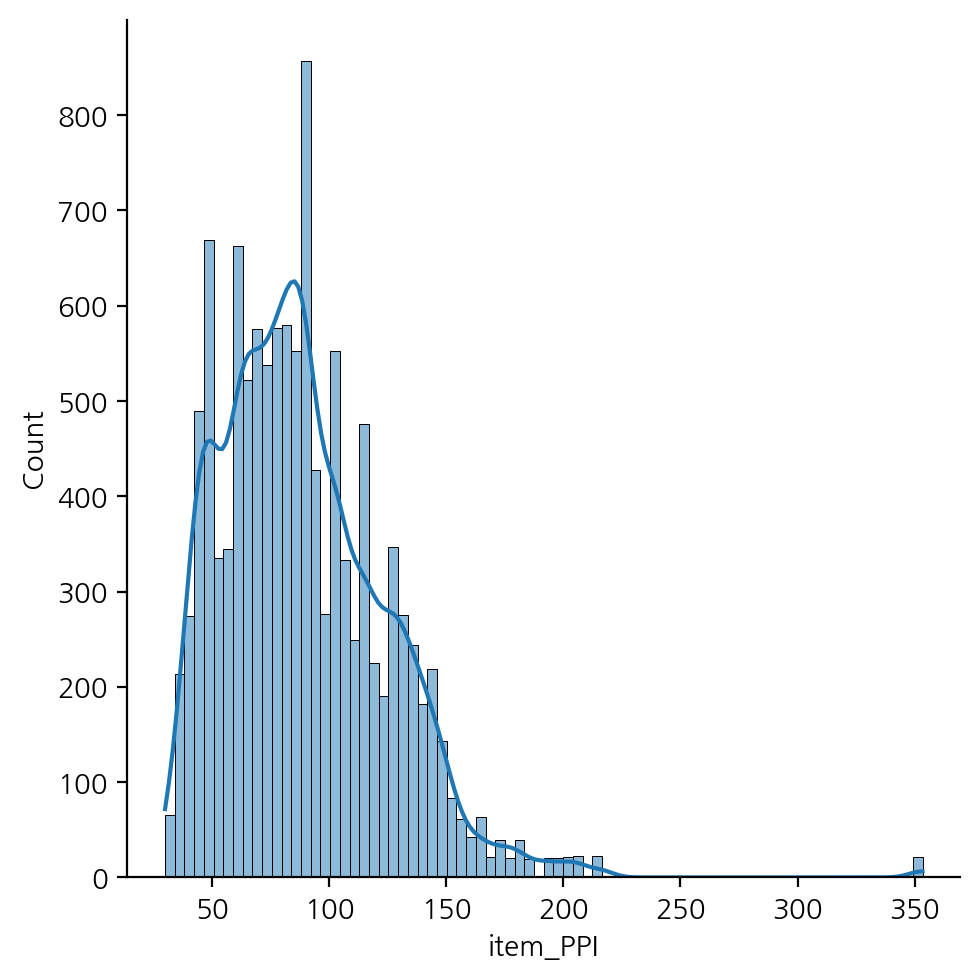

In [7]:
sns.displot(data=df_raw, x=df_raw.columns[7], kde=True)

# 시각화 (연도별)

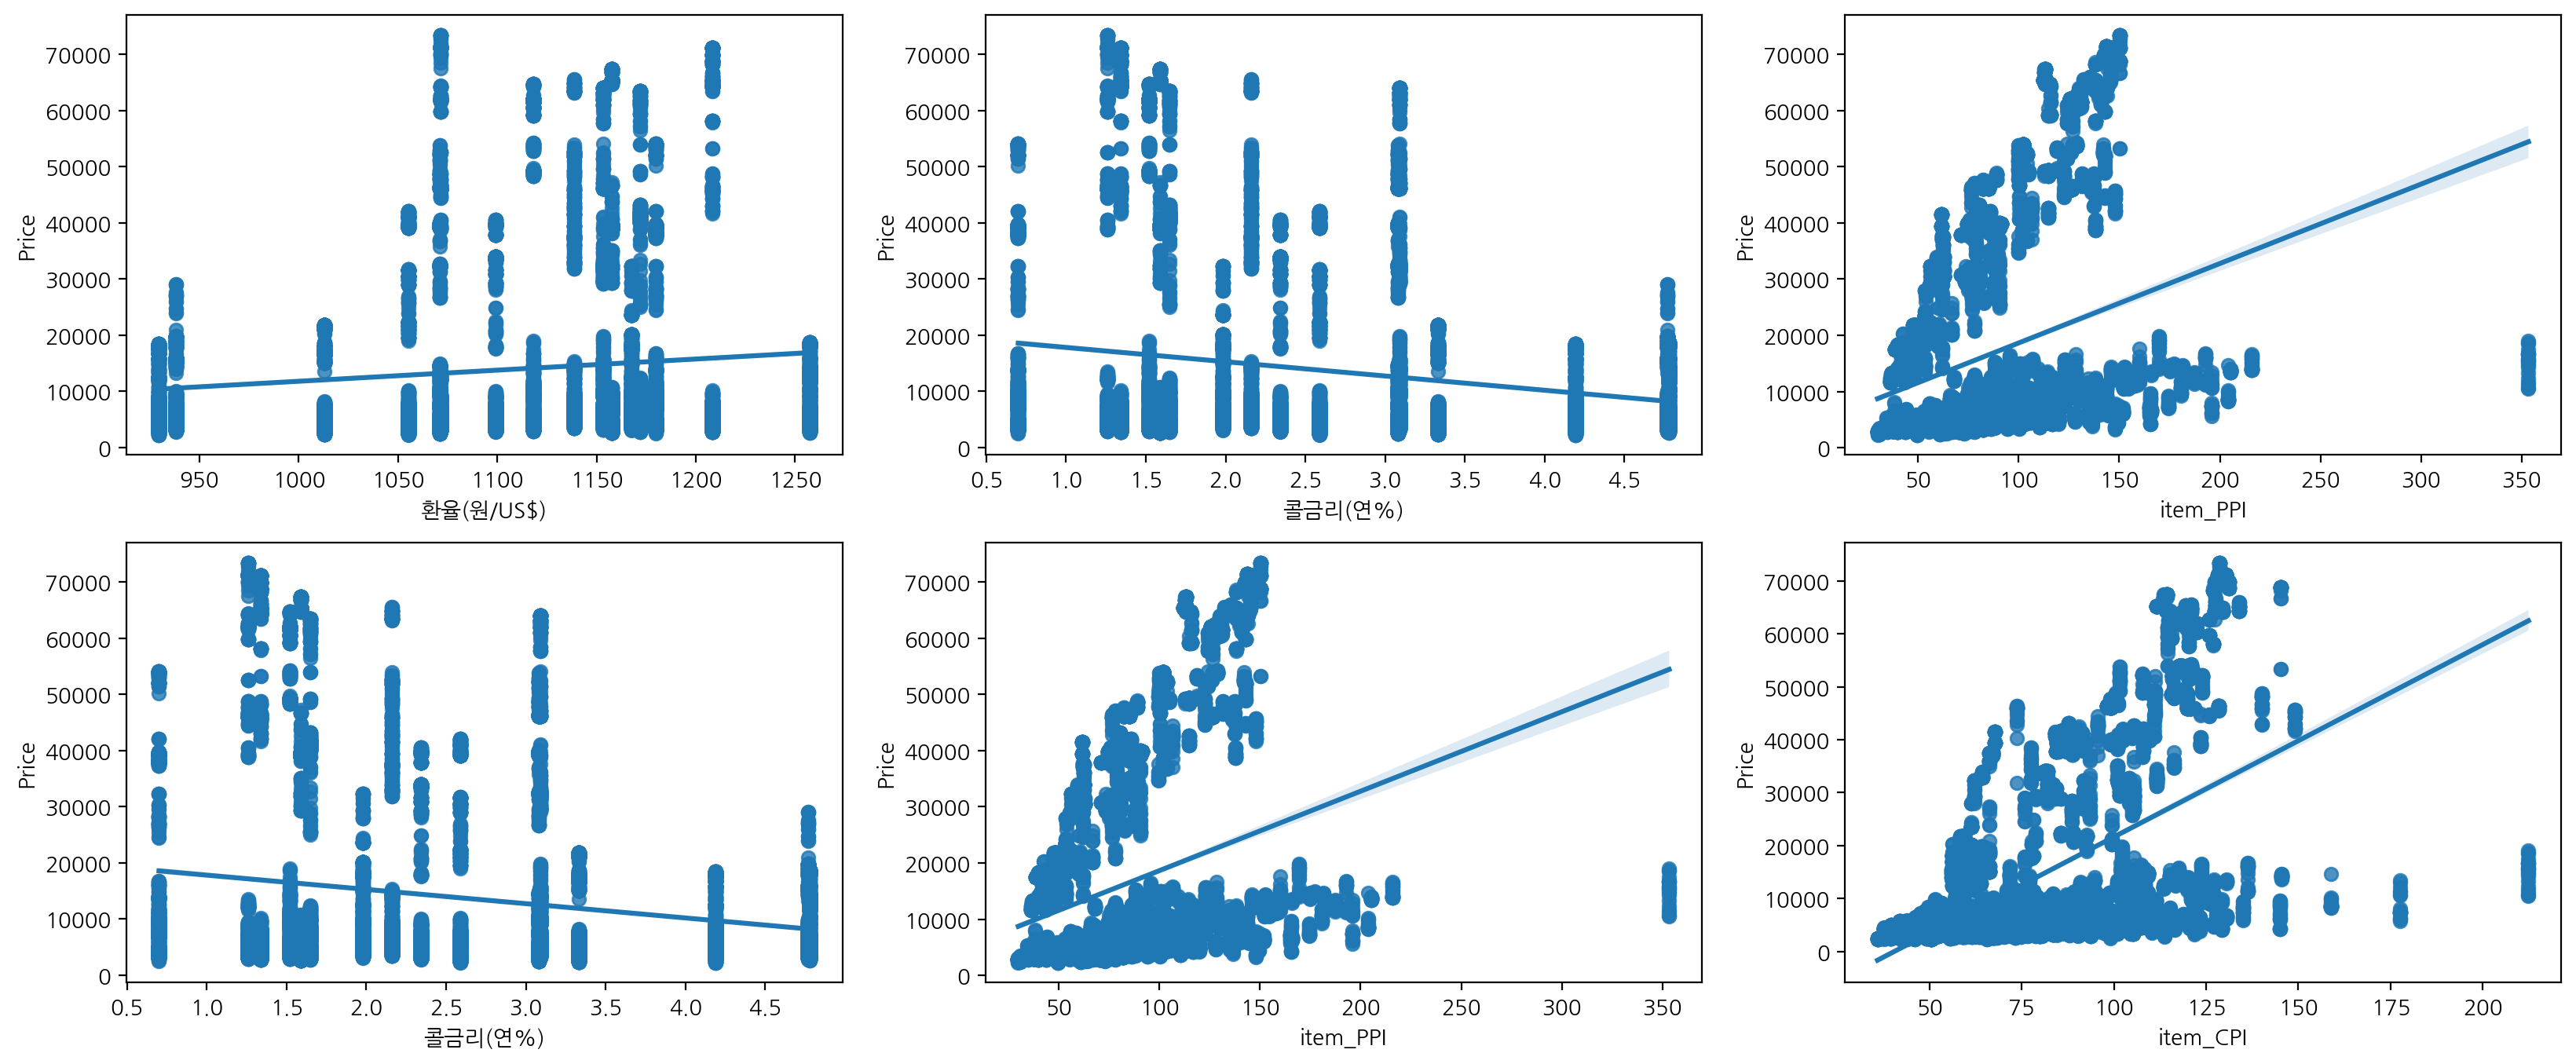

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
for i in range(2):
    for j in range(3):
        sns.regplot(data=df_raw, x=df_raw.columns[i+j+5], y='Price', ax=axes[i][j])

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
for i in range(2):
    for j in range(3):
        sns.regplot(data=transformer, x=transformer.columns[i+j+5], y='Price', ax=axes[i][j])

In [21]:
def AgriMarket_EDA(product:str, year:tuple) -> None:

    # input
    # product = input('품목을 입력하세요. : ')
    # start = int(input('시작 연도를 입력하세요. (4자리) : '))
    # end = int(input('끝 연도를 입력하세요. (4자리) : '))
    # print()
    start = year[0]
    end = year[1]
    
    
    if product not in product_w:
        print('해당 제품의 도매 거래내역이 없습니다.')
    
    elif ((min(df_gw[df_gw['Product']==product]['Y']) > end) | (max(df_gw[df_gw['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 도매 거래내역이 없습니다.')  
    
    else:
        df_gw[(df_gw['Product']==product) & (df_gw['Y'] >= start) & (df_gw['Y'] <= end)].groupby(['YMD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 도매가격 변동 그래프', fontsize=20)

    
    if product not in product_r:
        print('해당 제품의 소매 거래내역이 없습니다.')
    
    elif ((min(df_gr[df_gr['Product']==product]['Y']) > end) | (max(df_gr[df_gr['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 소매 거래내역이 없습니다.')
        
    else:
        df_gr[(df_gr['Product']==product) & (df_gr['Y'] >= start) & (df_gr['Y'] <= end)].groupby(['YMD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 소매가격 변동 그래프', fontsize=20)

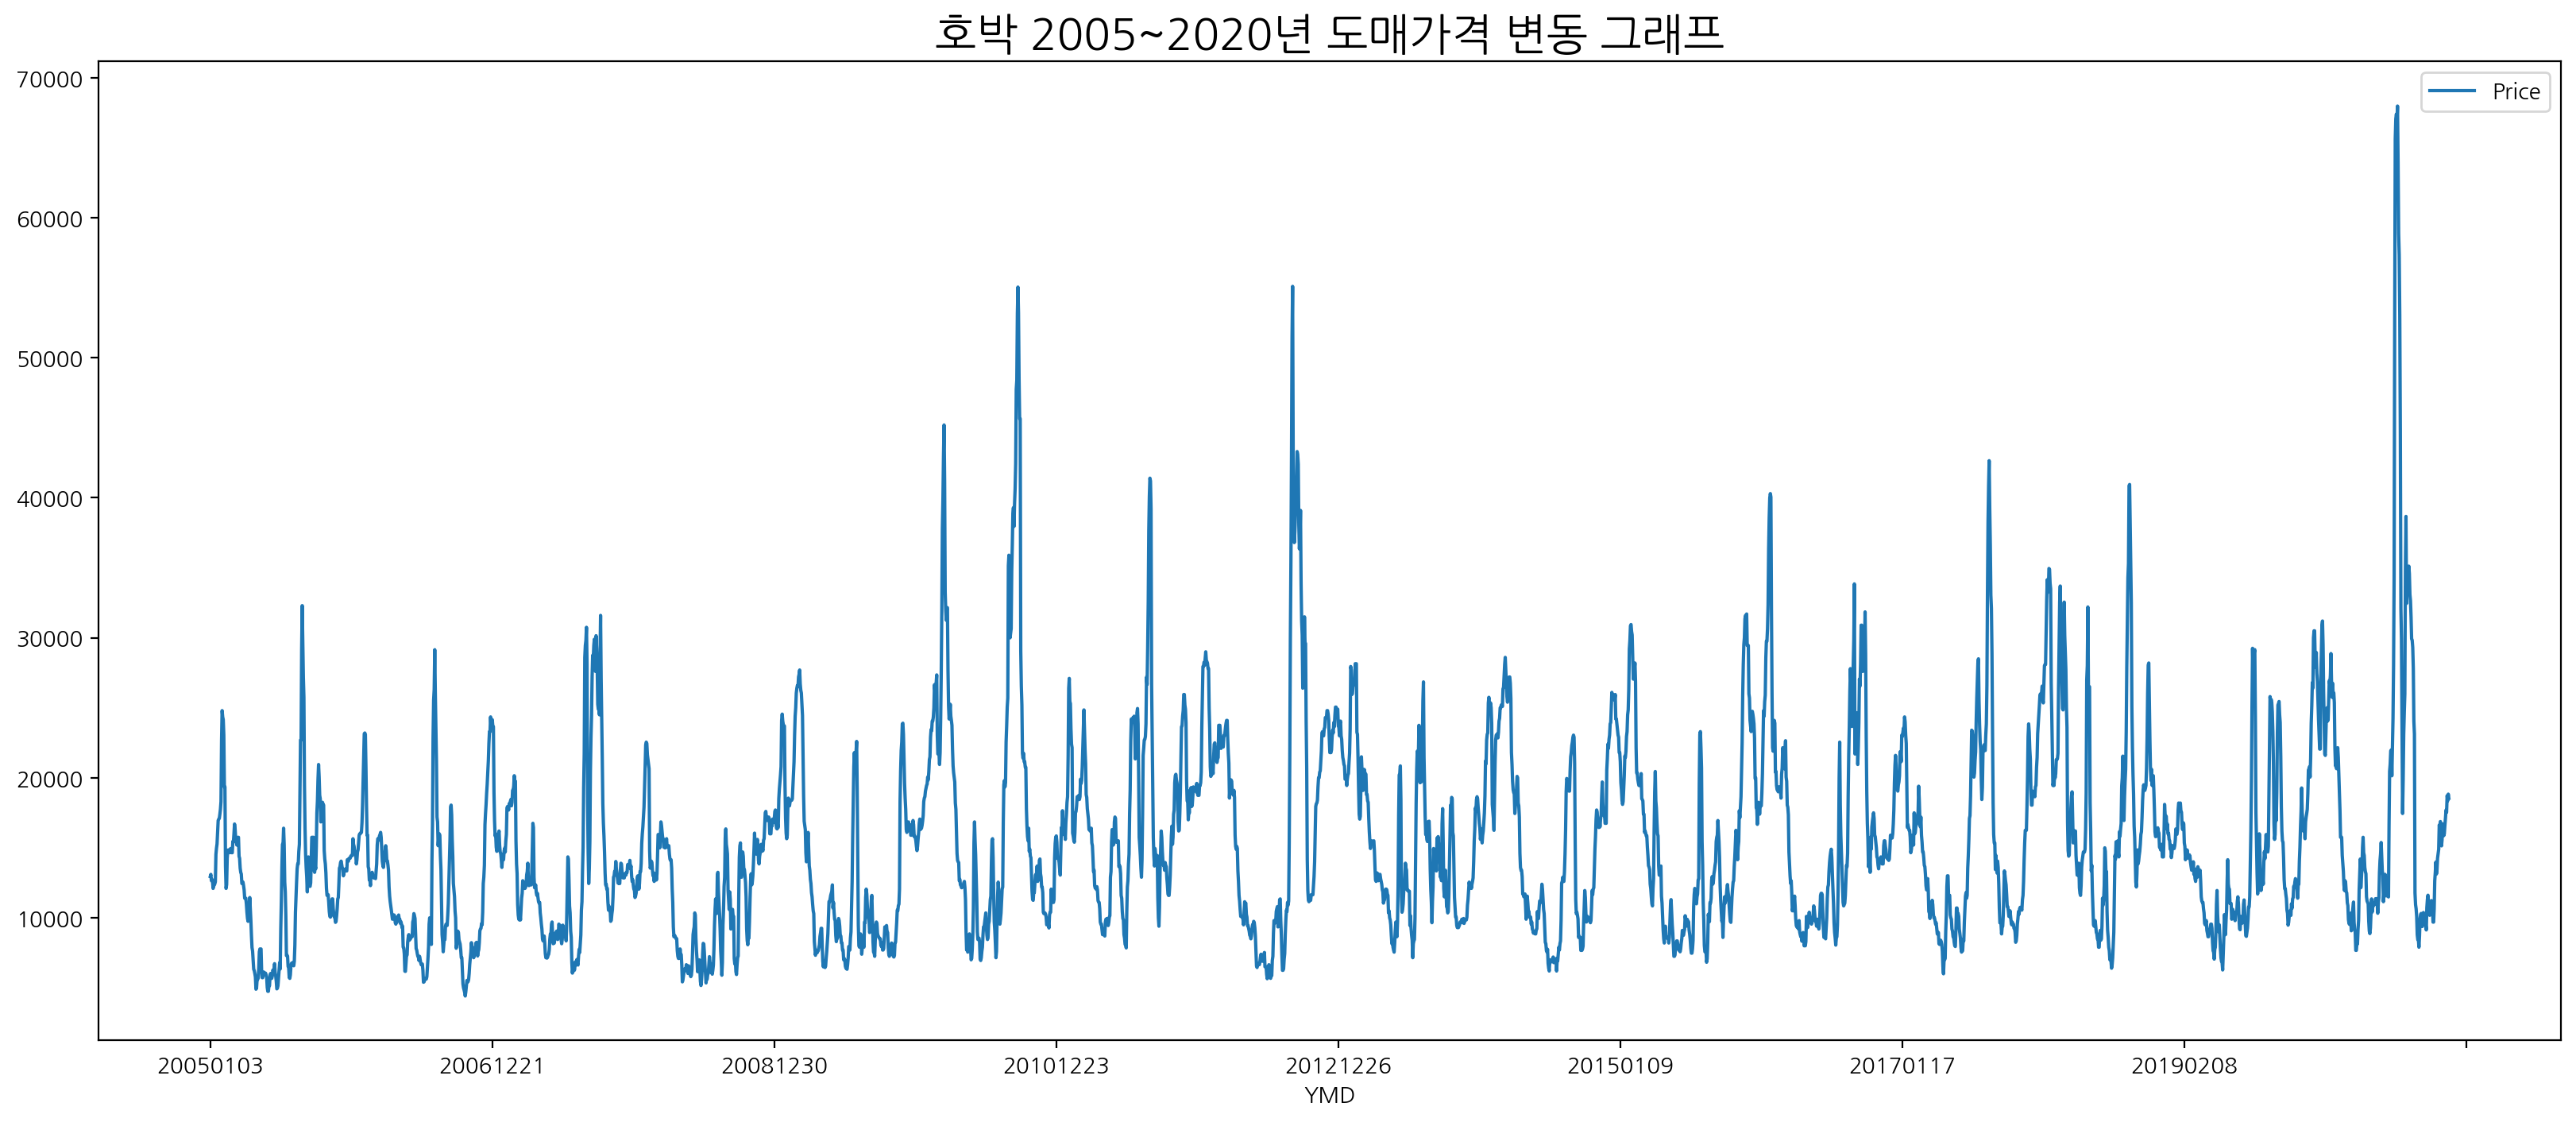

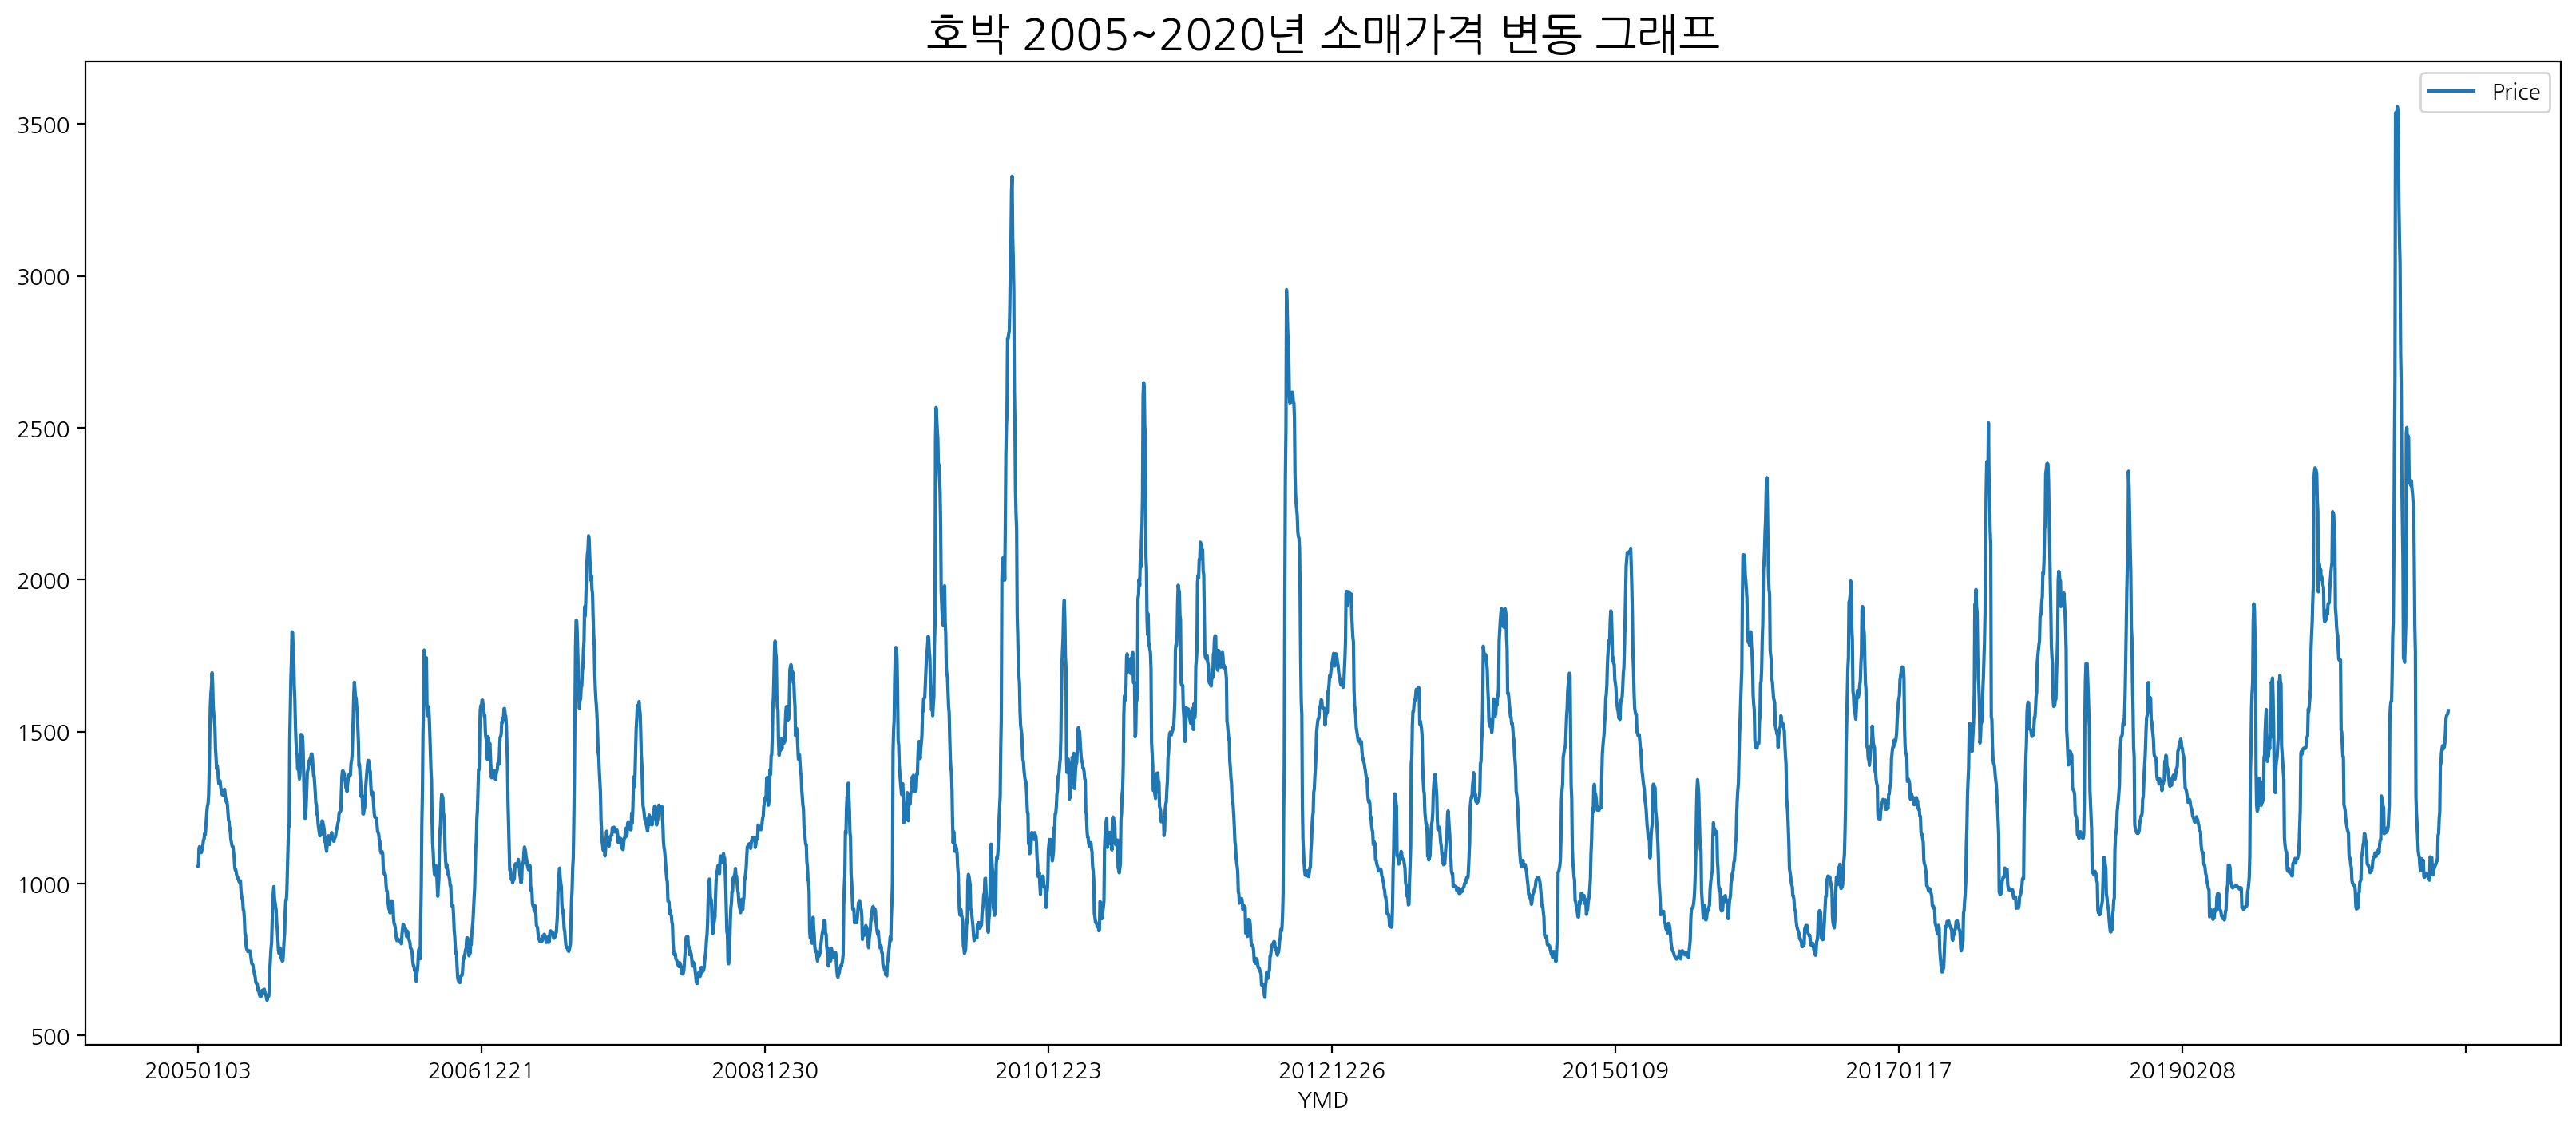

In [22]:
AgriMarket_EDA("호박", (2005, 2020))

# 시각화 (계절별)

In [25]:
def AgriMarket_viz(product:str, year:tuple) -> None:

    # input
    # product = input('품목을 입력하세요. : ')
    # start = int(input('시작 연도를 입력하세요. (4자리) : '))
    # end = int(input('끝 연도를 입력하세요. (4자리) : '))
    # print()
    start = year[0]
    end = year[1]
    
    
    if product not in product_w:
        print('해당 제품의 도매 거래내역이 없습니다.')
    
    elif ((min(df_gw[df_gw['Product']==product]['Y']) > end) | (max(df_gw[df_gw['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 도매 거래내역이 없습니다.')  
    
    else:
        df_gw[(df_gw['Product']==product) & (df_gw['Y'] >= start) & (df_gw['Y'] <= end)].groupby(['MD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 도매가격 변동 그래프', fontsize=20)

    
    if product not in product_r:
        print('해당 제품의 소매 거래내역이 없습니다.')
    
    elif ((min(df_gr[df_gr['Product']==product]['Y']) > end) | (max(df_gr[df_gr['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 소매 거래내역이 없습니다.')
        
    else:
        df_gr[(df_gr['Product']==product) & (df_gr['Y'] >= start) & (df_gr['Y'] <= end)].groupby(['MD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 소매가격 변동 그래프', fontsize=20)

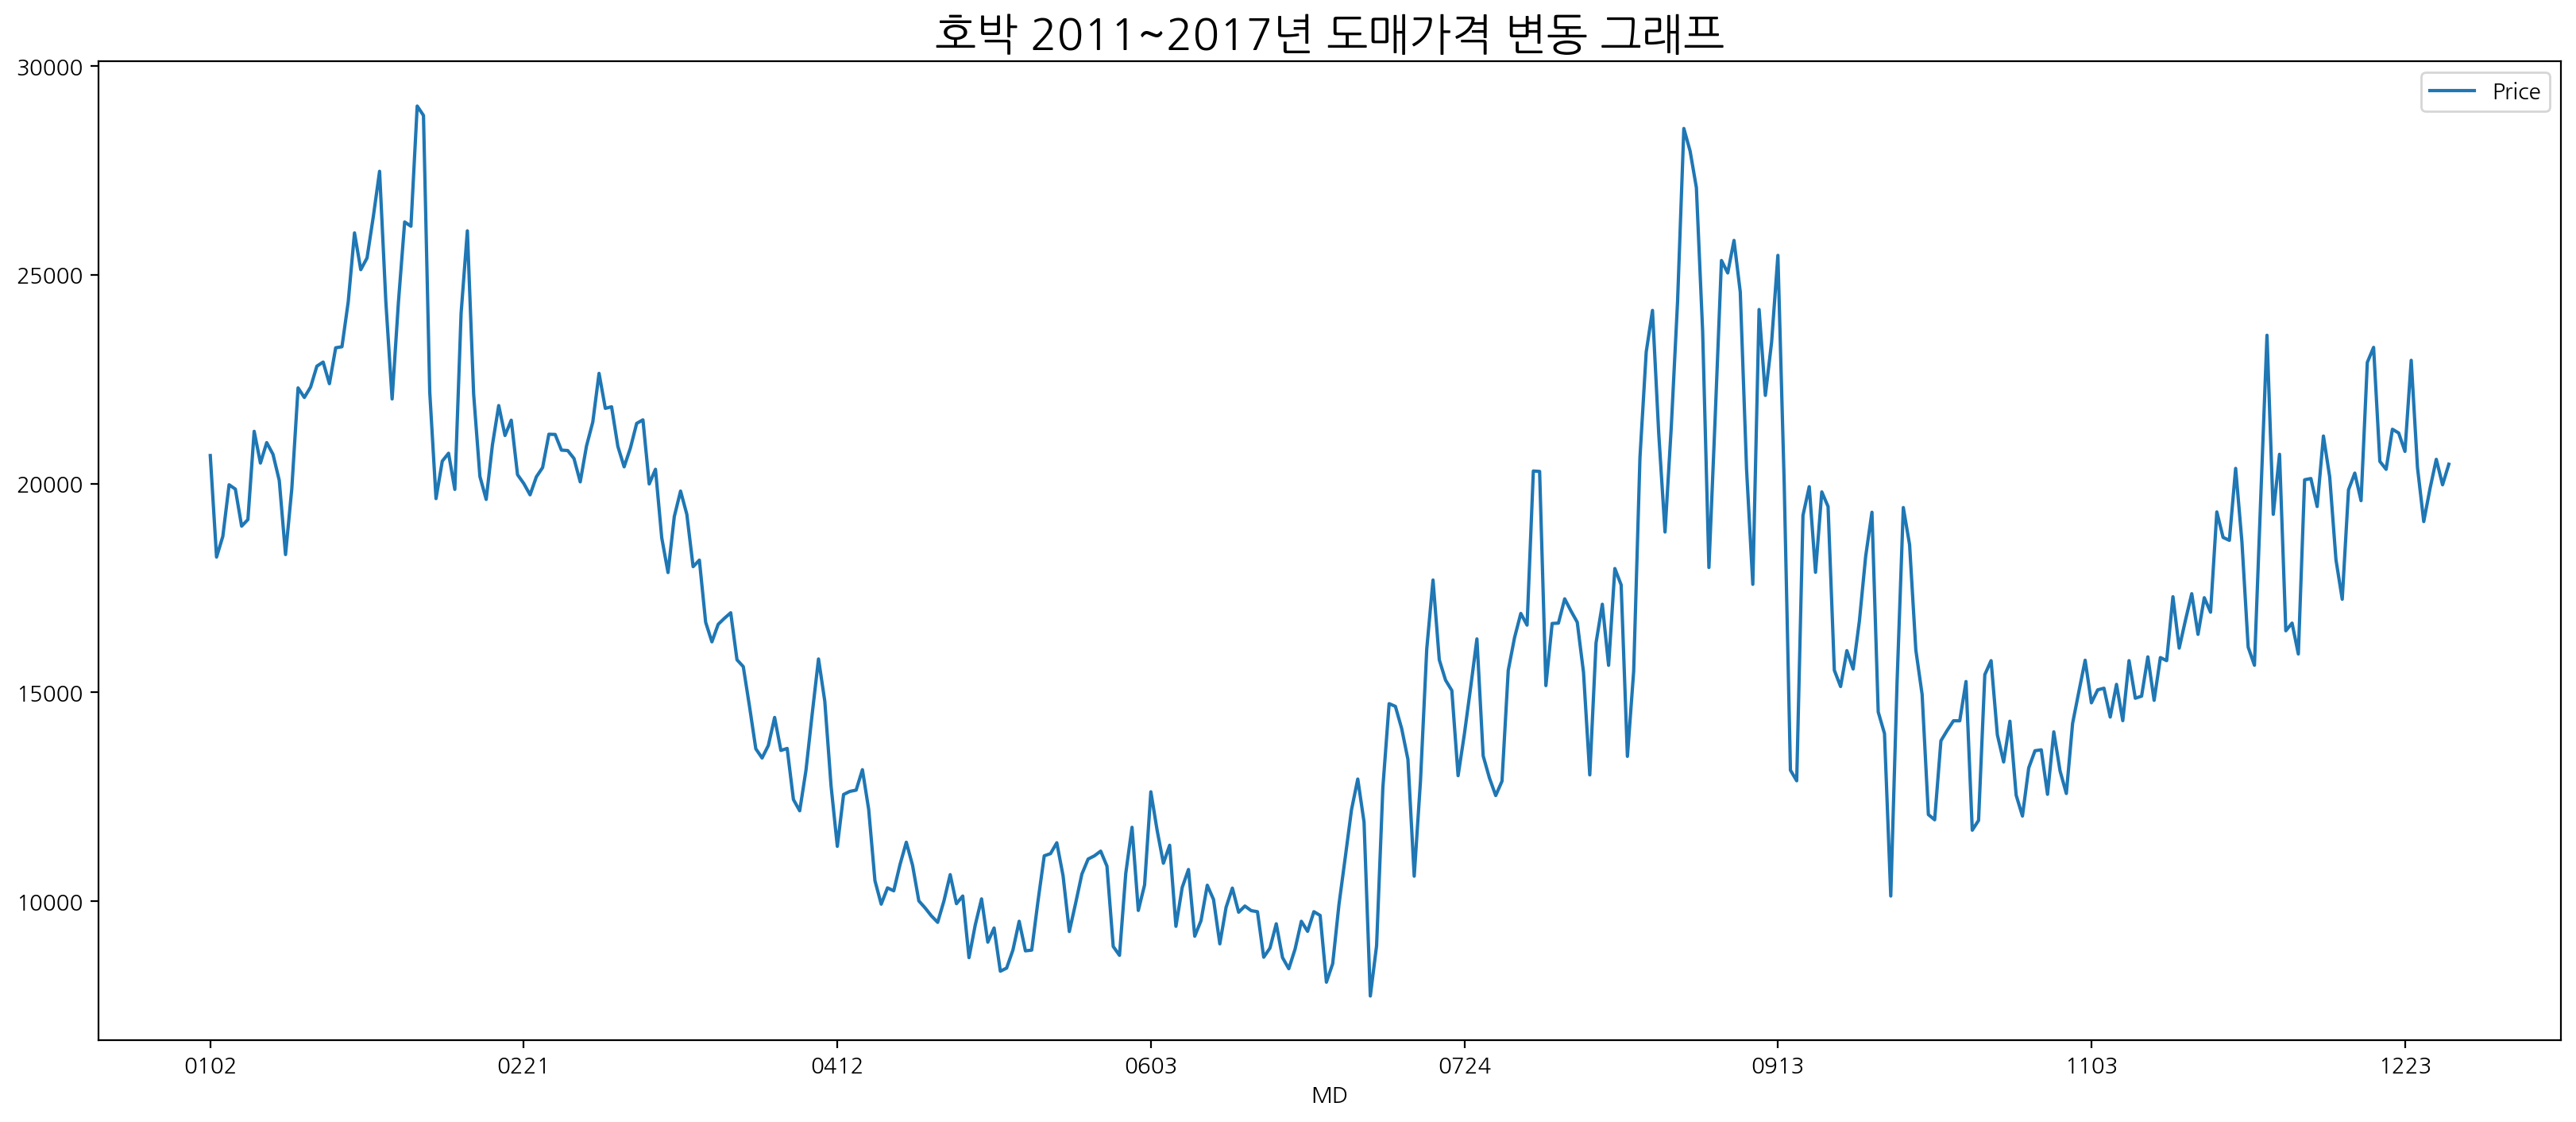

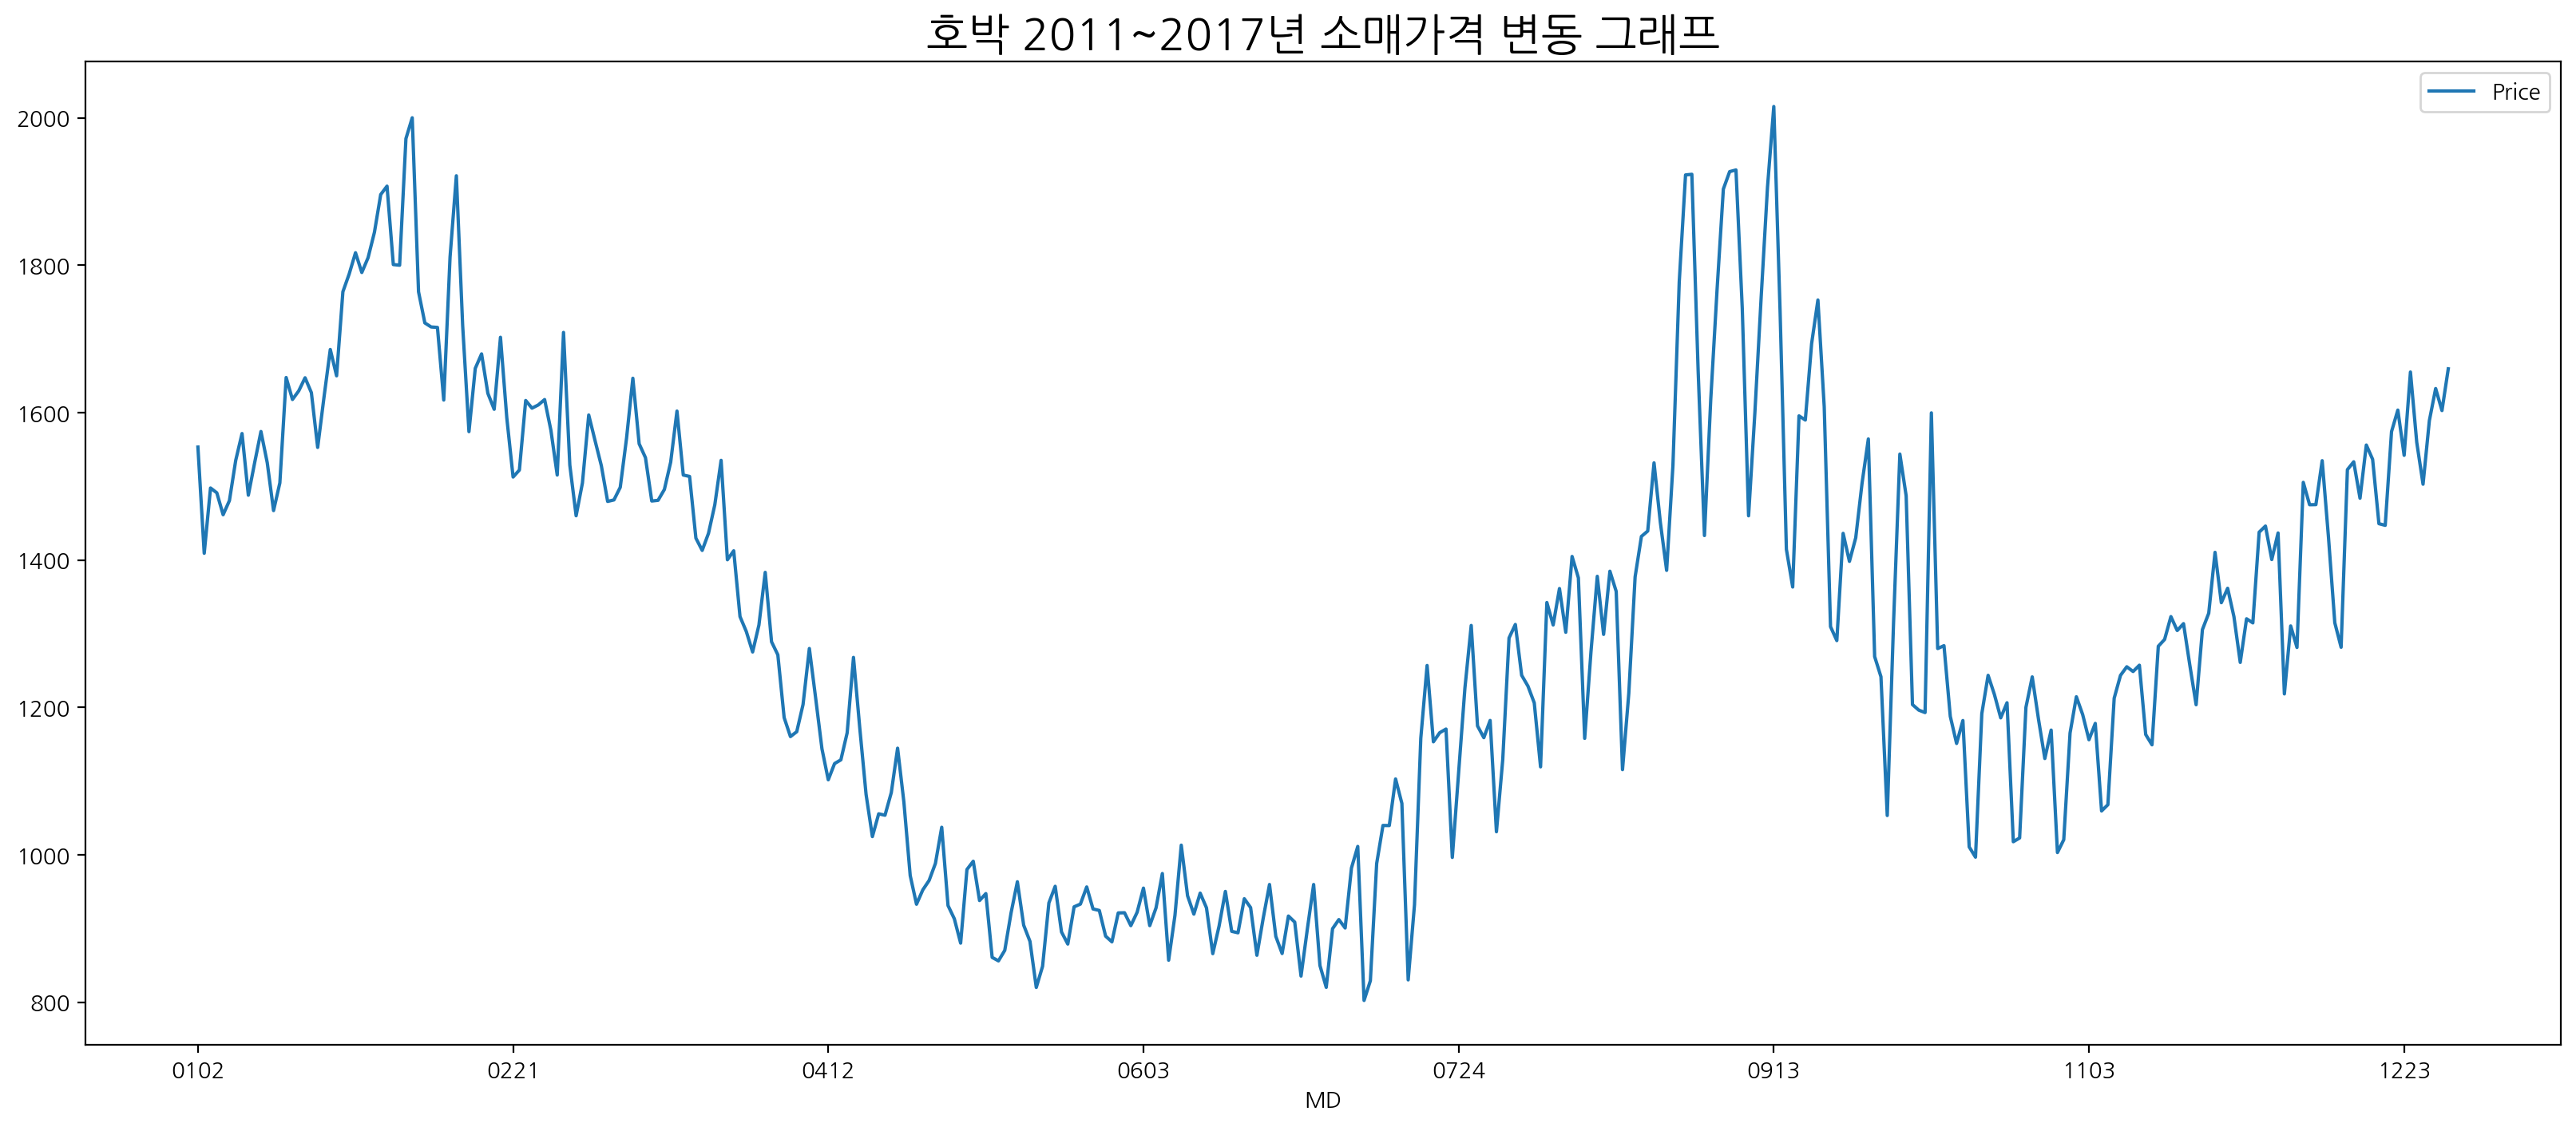

In [26]:
AgriMarket_viz("aksmf", (2011, 2017))

In [ ]:
1